# CODE UNTUK TANPA MENAMPILKAN VISUALISASI DARI PREDIKSI

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def predict_all_mouse_weights(file_path):
    """
    Melakukan prediksi berat mouse berdasarkan dimensi untuk semua entri
    dalam file CSV dan menambahkan kolom prediksi ke DataFrame.

    Args:
        file_path (str): Path ke file CSV yang berisi data mouse.

    Returns:
        pandas.DataFrame: DataFrame asli dengan kolom 'Predicted Weight (g)' yang baru.
                          Mengembalikan None jika terjadi kesalahan.
    """
    # 1. Load Data
    try:
        df = pd.read_csv('2025_06_15_MousedB.csv', sep=';')
    except FileNotFoundError:
        print(f"Error: File not found at {'2025_06_15_MousedB.csv'}")
        return None

    # Mengganti koma dengan titik pada kolom numerik dan mengonversi ke float
    for col in ['Length (mm)', 'Width (mm)', 'Height (mm)', 'Weight (g)']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
            # Menangani nilai non-numerik setelah penggantian koma
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # 2. Data Preprocessing
    # Menangani nilai yang hilang: mengisi dengan rata-rata kolom
    # Ini penting agar model dapat dilatih dan membuat prediksi
    for col in ['Length (mm)', 'Width (mm)', 'Height (mm)', 'Weight (g)']:
        if col in df.columns:
            if df[col].isnull().any():
                mean_val = df[col].mean()
                df[col].fillna(mean_val, inplace=True)
                print(f"Filled missing values in '{col}' with mean: {mean_val:.2f}")

    # Menghapus baris yang memiliki nilai NaN di kolom target setelah pengisian
    # Ini untuk memastikan data pelatihan bersih
    df_cleaned = df.dropna(subset=['Weight (g)']).copy()

    # 3. Feature Selection
    features = ['Length (mm)', 'Width (mm)', 'Height (mm)']
    target = 'Weight (g)'

    # Pastikan semua fitur yang dipilih ada di DataFrame
    for feature in features:
        if feature not in df_cleaned.columns:
            print(f"Error: Feature column '{feature}' not found in the CSV.")
            return None

    X = df_cleaned[features]
    y = df_cleaned[target]

    # Periksa apakah ada cukup data setelah preprocessing
    if X.empty or y.empty:
        print("Error: Not enough data after preprocessing to train the model.")
        return None

    # 4. Split Data (untuk evaluasi model)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. Model Training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 6. Evaluation (menggunakan data test)
    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)

    print("\n--- Model Evaluation (on test set) ---")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # 7. Automatic Prediction for ALL rows in the original DataFrame
    # Gunakan seluruh DataFrame asli untuk prediksi, setelah membersihkan kolom fitur
    # Penting: Pastikan kolom fitur di df_original juga sudah bersih dari NaN
    X_all = df[features]

    # Jika ada baris di X_all yang masih memiliki NaN (misalnya, jika ada baris yang
    # tidak memiliki 'Weight (g)' tetapi memiliki NaN di fitur), kita perlu menanganinya.
    # Untuk tujuan prediksi, kita akan mengisi NaN di fitur dengan rata-rata dari data pelatihan.
    # Atau, lebih baik, gunakan model yang dilatih pada data yang sudah diisi.

    # Untuk konsistensi, kita akan melatih ulang model pada seluruh data yang sudah dibersihkan
    # (bukan hanya data train) untuk prediksi pada seluruh dataset.
    # Ini adalah pendekatan yang lebih umum untuk membuat prediksi pada data baru.

    # Latih model pada seluruh data yang sudah dibersihkan (X, y)
    full_model = LinearRegression()
    full_model.fit(X, y)

    # Buat prediksi untuk semua baris di DataFrame asli (df)
    # Pastikan kolom fitur di df sudah diisi NaN-nya
    df['Predicted Weight (g)'] = full_model.predict(df[features])

    print("\n--- Predictions Added to DataFrame ---")
    print("A new column 'Predicted Weight (g)' has been added to the DataFrame.")
    print("Here are the first few rows with predictions:")
    print(df[['Brand', 'Name', 'Weight (g)', 'Predicted Weight (g)']].head())

    return df

# Panggil fungsi untuk menjalankan prediksi otomatis
file_name = '2025_06_15_MousedB.csv'
updated_df = predict_all_mouse_weights(file_name)

if updated_df is not None:
    # Anda bisa menyimpan DataFrame yang diperbarui ke file CSV baru jika diinginkan
    # updated_df.to_csv('2025_06_15_MousedB_with_predictions.csv', index=False, sep=';')
    # print("\nUpdated DataFrame saved to '2025_06_15_MousedB_with_predictions.csv'")
    pass


Filled missing values in 'Weight (g)' with mean: 68.19

--- Model Evaluation (on test set) ---
Mean Squared Error (MSE): 323.33
Root Mean Squared Error (RMSE): 17.98
R-squared (R2): 0.50

--- Predictions Added to DataFrame ---
A new column 'Predicted Weight (g)' has been added to the DataFrame.
Here are the first few rows with predictions:
          Brand                       Name  Weight (g)  Predicted Weight (g)
0  Pulsar ZywOo    The Chosen Mouse - Mini        55.0             63.085001
1  Pulsar ZywOo  The Chosen Mouse - Medium        59.0             73.069298
2       WLmouse                    Sword X        47.0             74.508267
3    Darmoshark               M3 Micro Pro        42.0             33.729150
4          ASUS    ROG Gladius II Wireless        90.0             78.554358


/tmp/ipython-input-6-2424630827.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


# CODE UNTUK MENAMPILKAN VISUALISASI DARI PREDIKSI

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_visualize_mouse_weights(file_path):
    """
    Melakukan prediksi berat mouse, menambahkan kolom prediksi ke DataFrame,
    dan menampilkan berbagai visualisasi data dan hasil prediksi.

    Args:
        file_path (str): Path ke file CSV yang berisi data mouse.

    Returns:
        tuple: A tuple containing:
            - pandas.DataFrame: DataFrame asli dengan kolom 'Predicted Weight (g)' yang baru.
            - pandas.Series: The true target values for the test set (y_test).
            - numpy.ndarray: The predicted target values for the test set (y_pred_test).
            Mengembalikan (None, None, None) jika terjadi kesalahan.
    """
    # 1. Load Data
    try:
        df = pd.read_csv('2025_06_15_MousedB.csv', sep=';')
    except FileNotFoundError:
        print(f"Error: File not found at {'2025_06_15_MousedB.csv'}")
        return None, None, None

    # Mengganti koma dengan titik pada kolom numerik dan mengonversi ke float
    for col in ['Length (mm)', 'Width (mm)', 'Height (mm)', 'Weight (g)']:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
            # Menangani nilai non-numerik setelah penggantian koma
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # 2. Data Preprocessing
    # Menangani nilai yang hilang: mengisi dengan rata-rata kolom
    for col in ['Length (mm)', 'Width (mm)', 'Height (mm)', 'Weight (g)']:
        if col in df.columns:
            if df[col].isnull().any():
                mean_val = df[col].mean()
                df[col] = df[col].fillna(mean_val) # Removed inplace=True and reassigned
                print(f"Filled missing values in '{col}' with mean: {mean_val:.2f}")

    # Menghapus baris yang memiliki nilai NaN di kolom target setelah pengisian
    df_cleaned = df.dropna(subset=['Weight (g)']).copy()

    # 3. Feature Selection
    features = ['Length (mm)', 'Width (mm)', 'Height (mm)']
    target = 'Weight (g)'

    # Pastikan semua fitur yang dipilih ada di DataFrame
    for feature in features:
        if feature not in df_cleaned.columns:
            print(f"Error: Feature column '{feature}' not found in the CSV.")
            return None, None, None

    X = df_cleaned[features]
    y = df_cleaned[target]

    # Periksa apakah ada cukup data setelah preprocessing
    if X.empty or y.empty:
        print("Error: Not enough data after preprocessing to train the model.")
        return None, None, None

    # 4. Split Data (untuk evaluasi model)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. Model Training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 6. Evaluation (on test set)
    y_pred_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)

    print("\n--- Model Evaluation (on test set) ---")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # 7. Automatic Prediction for ALL rows in the original DataFrame
    full_model = LinearRegression()
    full_model.fit(X, y) # Train on all cleaned data for final predictions

    df['Predicted Weight (g)'] = full_model.predict(df[features])

    print("\n--- Predictions Added to DataFrame ---")
    print("A new column 'Predicted Weight (g)' has been added to the DataFrame.")
    print("Here are the first few rows with predictions:")
    print(df[['Brand', 'Name', 'Weight (g)', 'Predicted Weight (g)']].head())

    return df, y_test, y_pred_test

Filled missing values in 'Weight (g)' with mean: 68.19

--- Model Evaluation (on test set) ---
Mean Squared Error (MSE): 323.33
Root Mean Squared Error (RMSE): 17.98
R-squared (R2): 0.50

--- Predictions Added to DataFrame ---
A new column 'Predicted Weight (g)' has been added to the DataFrame.
Here are the first few rows with predictions:
          Brand                       Name  Weight (g)  Predicted Weight (g)
0  Pulsar ZywOo    The Chosen Mouse - Mini        55.0             63.085001
1  Pulsar ZywOo  The Chosen Mouse - Medium        59.0             73.069298
2       WLmouse                    Sword X        47.0             74.508267
3    Darmoshark               M3 Micro Pro        42.0             33.729150
4          ASUS    ROG Gladius II Wireless        90.0             78.554358


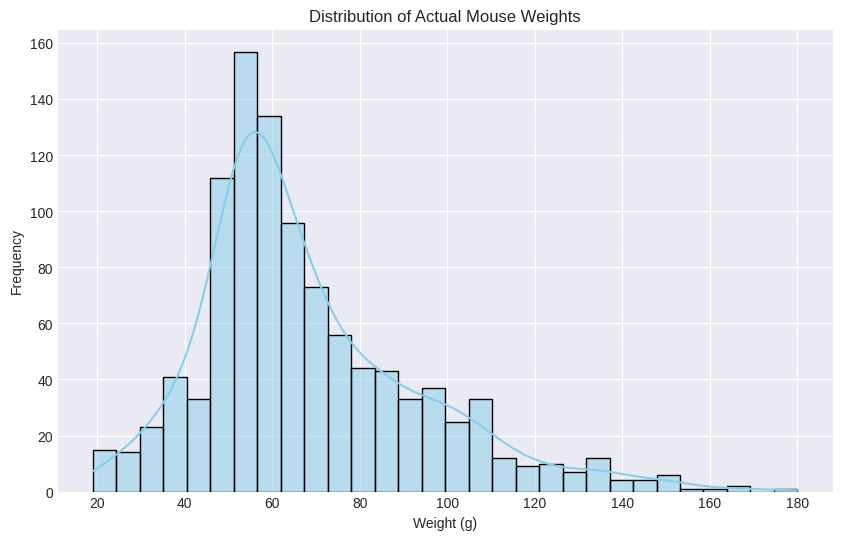

In [23]:
# Call the function to get the DataFrame with predictions and test results
file_name = '2025_06_15_MousedB.csv' # Ensure this file path is correct
df, y_test, y_pred_test = predict_and_visualize_mouse_weights(file_name)

if df is not None:
    plt.style.use('seaborn-v0_8-darkgrid') # Menggunakan style seaborn untuk tampilan yang lebih baik
    # Visualisasi 1: Histogram Berat Aktual
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Weight (g)'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Actual Mouse Weights')
    plt.xlabel('Weight (g)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Could not load data or generate predictions. Cannot plot.")

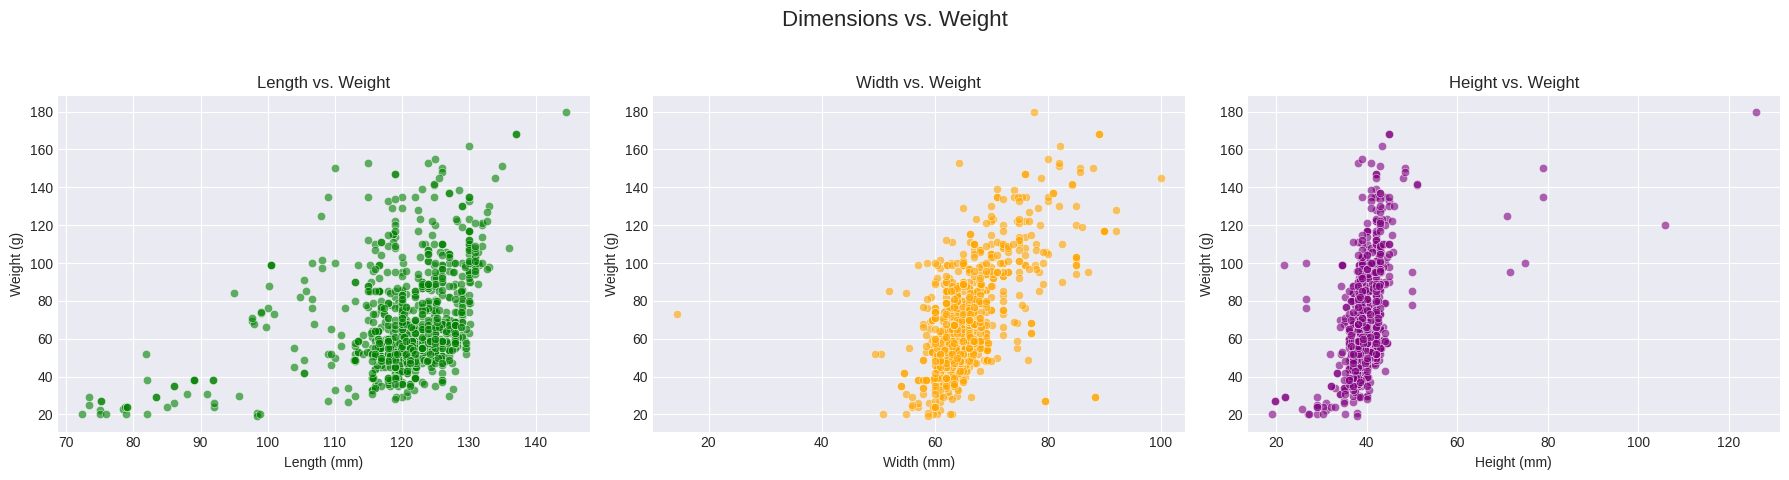

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Dimensions vs. Weight', fontsize=16)
sns.scatterplot(ax=axes[0], x='Length (mm)', y='Weight (g)', data=df, color='green', alpha=0.6)
axes[0].set_title('Length vs. Weight')
axes[0].set_xlabel('Length (mm)')
axes[0].set_ylabel('Weight (g)')
sns.scatterplot(ax=axes[1], x='Width (mm)', y='Weight (g)', data=df, color='orange', alpha=0.6)
axes[1].set_title('Width vs. Weight')
axes[1].set_xlabel('Width (mm)')
axes[1].set_ylabel('Weight (g)')
sns.scatterplot(ax=axes[2], x='Height (mm)', y='Weight (g)', data=df, color='purple', alpha=0.6)
axes[2].set_title('Height vs. Weight')
axes[2].set_xlabel('Height (mm)')
axes[2].set_ylabel('Weight (g)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Menyesuaikan layout agar judul tidak tumpang tindih
plt.show()

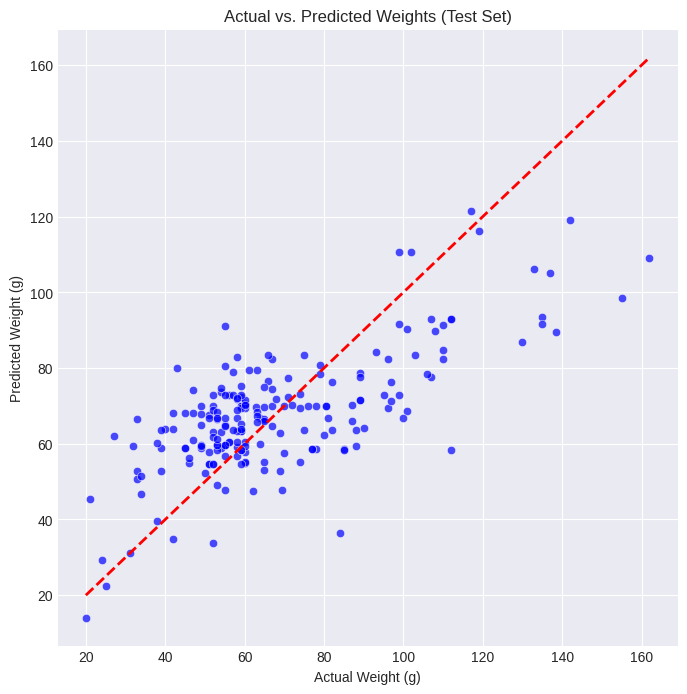

In [24]:
if df is not None:
    # Visualisasi 3: Berat Aktual vs. Berat Prediksi
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test, y=y_pred_test, color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Garis y=x
    plt.title('Actual vs. Predicted Weights (Test Set)')
    plt.xlabel('Actual Weight (g)')
    plt.ylabel('Predicted Weight (g)')
    plt.grid(True)
    plt.show()
else:
    print("Could not load data or generate predictions. Cannot plot.")

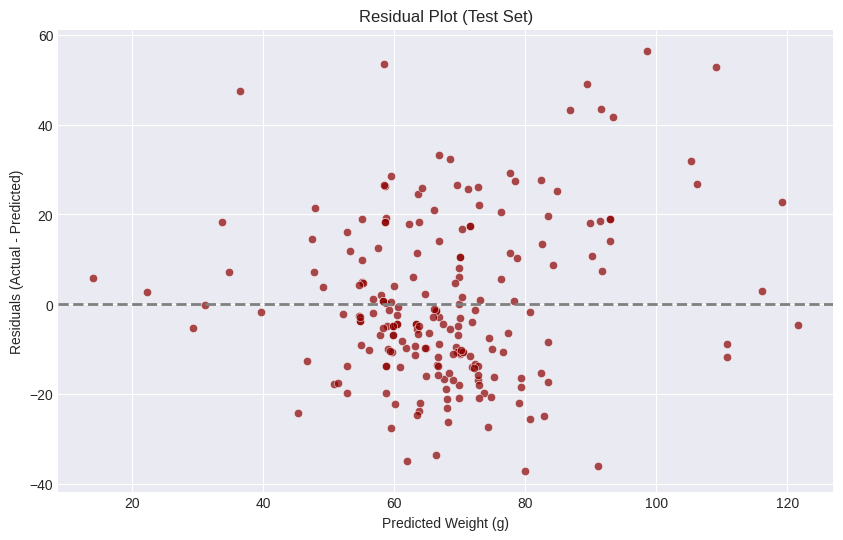

In [26]:
# Visualisasi 4: Residual Plot
# Residuals = Actual - Predicted
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_test, y=residuals, color='darkred', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--', lw=2) # Garis nol untuk residual
plt.title('Residual Plot (Test Set)')
plt.xlabel('Predicted Weight (g)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()